In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re

# Import helper functions
import helper_functions as fu

In [2]:
# votes_meps_EP9_or = fu.read_xlsx('data/EP9_RCVs_2022_06_22.xlsx')
# voted_docs_EP9_or = fu.read_xlsx('data/EP9_Voted_docs.xlsx')
# votes_meps_EP8_or = fu.read_xlsx('data/EP8_RCVs_2019_06_25.xlsx')
#voted_docs_EP8_or = fu.read_xlsx('data/EP8_Voted_docs.xlsx')
# votes_meps_EP7_or = fu.read_xlsx('data/EP7_RCVs_2014_06_19.xlsx')
#voted_docs_EP7_or = fu.read_xlsx('data/EP7_Voted_docs.xlsx')

In [3]:
# Save original data as csv
# votes_meps_EP9_or.to_csv('data/EP9_RCVs_2022_06_22.csv', index=False)
# voted_docs_EP9_or.to_csv('data/EP9_Voted_docs.csv', index=False)
# votes_meps_EP8_or.to_csv('data/EP8_RCVs_2019_06_25.csv', index=False)
#voted_docs_EP8_or.to_csv('data/EP8_Voted_docs.csv', index=False)
# votes_meps_EP7_or.to_csv('data/EP7_RCVs_2014_06_19.csv', index=False)
#voted_docs_EP7_or.to_csv('data/EP7_Voted_docs.csv', index=False)

In [4]:
# read in csv files
votes_meps_EP9_or = pd.read_csv('data/EP9_RCVs_2022_06_22.csv')
voted_docs_EP9_or = pd.read_csv('data/EP9_Voted_docs.csv')
votes_meps_EP8_or = pd.read_csv('data/EP8_RCVs_2019_06_25.csv')
voted_docs_EP8_or = pd.read_csv('data/EP8_Voted_docs.csv')
votes_meps_EP7_or = pd.read_csv('data/EP7_RCVs_2014_06_19.csv')
voted_docs_EP7_or = pd.read_csv('data/EP7_Voted_docs.csv')

In [5]:
print(votes_meps_EP9_or.shape)
print(votes_meps_EP8_or.shape)
print(votes_meps_EP7_or.shape)
display(votes_meps_EP9_or.head())
display(voted_docs_EP9_or.head())

(811, 13469)
(858, 10261)
(853, 6970)


,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,197490,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,2,2,2,1,1,2,1,2,1,1
1,189525,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
2,124831,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
3,197826,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,IDG,2019-07-02,2024-12-31,...,2,2,1,2,2,1,1,3,2,1
4,197403,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,3,3,1,2,2,2,3,3,2,1


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
0,1,1,1,15.07.2019,Tuesday - request by the GUE/NGL group,NaN,Non,Proposal for a decision,s,0,...,Foreign & security policy,Procedural vote,1.0,NaN,0,RCV,-,83,142,72
1,2,2,1,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 13,0.0,NaN,original text,RCV,+,311,269,33
2,3,2,2,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 14,0.0,NaN,original text,RCV,+,437,155,33
3,4,2,3,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 17,0.0,NaN,original text,RCV,+,441,158,27
4,5,2,4,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 19,0.0,NaN,original text,RCV,+,466,146,41


In [6]:
# total number of votes 2014 to 2022
total_votes_14to22 = voted_docs_EP9_or.shape[0] + voted_docs_EP8_or.shape[0] + voted_docs_EP7_or.shape[0]

print(f"There have been {total_votes_14to22} RCV votes in the European Parliament from 2014 to 2022.")

There have been 30672 RCV votes in the European Parliament from 2014 to 2022.


In [7]:
# Only choose legislative procedure with Parliament as co-legislator
voted_docs_EP9 = voted_docs_EP9_or[voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '*']
voted_docs_EP9 = voted_docs_EP9[voted_docs_EP9['Procedure'] != '* ']

voted_docs_EP8 = voted_docs_EP8_or[voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '*']
voted_docs_EP8 = voted_docs_EP8[voted_docs_EP8['Procedure'] != '* ']

voted_docs_EP7 = voted_docs_EP7_or[voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '*']
voted_docs_EP7 = voted_docs_EP7[voted_docs_EP7['Procedure'] != '* ']

total_votes_leg = voted_docs_EP9.shape[0] + voted_docs_EP8.shape[0] + voted_docs_EP7.shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_leg} legal procedures, excluding votes on budget.")

# Count votes on budget
total_votes_bud = voted_docs_EP9_or[
    voted_docs_EP9_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP8_or[
        voted_docs_EP8_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0] + voted_docs_EP7_or[
            voted_docs_EP7_or['Leg/Non-Leg/Bud'] == 'Bud'].shape[0]
print(f"The European Parliament voted as co-legislator on {total_votes_bud} budget procedures.")

The European Parliament voted as co-legislator on 6418 legal procedures, excluding votes on budget.
The European Parliament voted as co-legislator on 2392 budget procedures.


(2582, 24)
(193, 24)
(2107, 33)
(534, 33)
(1729, 28)
(500, 28)


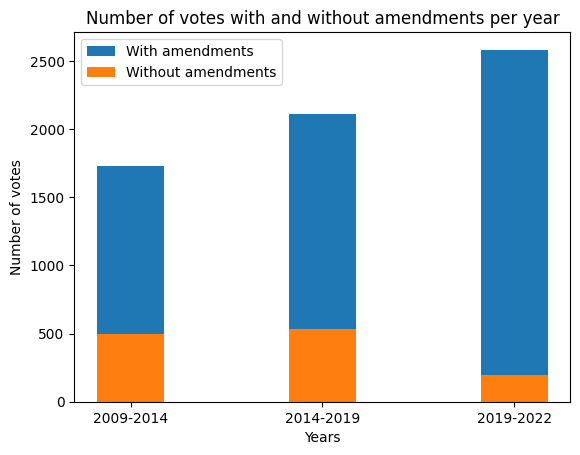

Between 2009 and 2022, the European Parliament adopted or rejected 1227 proposed laws.


In [8]:
# Delete votes on amendments

# copy voted_docs_consensus to voted_docs_consensus_laws
print(voted_docs_EP9.shape)
# if Subject column begins with "Art" or "Committee - separate", delete row
voted_laws_EP9 = voted_docs_EP9[~voted_docs_EP9['Subject'].str.contains('Art|Paragraph|paragraph|point|Committee - separate')]
# if "Subject" is "vote: Commission proposal" and title appears in more than one row, keep only row where Subject is "vote: Commission proposal"
voted_laws_EP9 = voted_laws_EP9[~((voted_laws_EP9['Subject'] != 'Vote: Commission proposal') & (voted_laws_EP9['Title'].duplicated(keep = False)))]
print(voted_laws_EP9.shape)
#display(voted_docs_laws_EP9_test.head(10))

print(voted_docs_EP8.shape)
voted_laws_EP8 = voted_docs_EP8[~voted_docs_EP8['Subject'].str.contains('Art|Paragraph|paragraph|point|Committee - separate')]
voted_laws_EP8 = voted_laws_EP8[~((voted_laws_EP8['Subject'] != 'Vote: Commission proposal') & (voted_laws_EP8['Title'].duplicated(keep = False)))]
print(voted_laws_EP8.shape)
#display(voted_docs_laws_EP8_test.head(10))

print(voted_docs_EP7.shape)
voted_laws_EP7 = voted_docs_EP7[~voted_docs_EP7['Subject'].str.contains('Art|Paragraph|paragraph|point|Committee - separate')]
voted_laws_EP7 = voted_laws_EP7[~((voted_laws_EP7['Subject'] != 'Vote: Commission proposal') & (voted_laws_EP7['Title'].duplicated(keep = False)))]
print(voted_laws_EP7.shape)
#display(voted_docs_laws_EP7_test.head(10))

# Bar plot on number of votes per year with and without amendments
votes_with_amendments = [voted_docs_EP7.shape[0], voted_docs_EP8.shape[0], voted_docs_EP9.shape[0]]
votes_without_amendments = [voted_laws_EP7.shape[0], voted_laws_EP8.shape[0], voted_laws_EP9.shape[0]]
years = ['2009-2014', '2014-2019', '2019-2022']
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(years, votes_with_amendments, bar_width, label='With amendments')
bar2 = ax.bar(years, votes_without_amendments, bar_width, label='Without amendments')
ax.set_xlabel('Years')
ax.set_ylabel('Number of votes')
ax.set_title('Number of votes with and without amendments per year')
ax.legend()
plt.show()

# Total number of votes on laws
total_votes_laws = voted_laws_EP9.shape[0] + voted_laws_EP8.shape[0] + voted_laws_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament adopted or rejected {total_votes_laws} proposed laws.")

How many legislative procedures were rejected?

In [9]:
# How many final laws were rejected
rejected_laws_EP9 = voted_laws_EP9[voted_laws_EP9['Vote'] == '-']
rejected_laws_EP8 = voted_laws_EP8[voted_laws_EP8['Vote'] == '-']
rejected_laws_EP7 = voted_laws_EP7[voted_laws_EP7['Vote'] == '-']
rejected_laws = rejected_laws_EP9.shape[0] + rejected_laws_EP8.shape[0] + rejected_laws_EP7.shape[0]
print(f"Between 2009 and 2022, the European Parliament rejected {rejected_laws} proposed laws, this is {round((rejected_laws/total_votes_laws)*100, 2)}% of all proposed laws.")

Between 2009 and 2022, the European Parliament rejected 31 proposed laws, this is 2.53% of all proposed laws.


In [10]:
# percentage of votes rejected out of the 2582 legislative procedures
votes_rejected = voted_docs_EP9[voted_docs_EP9['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP9.shape[0]
print(f"Between 2019-2022, {votes_rejected_perc:.2%} of all legislative procedures were rejected, including amendments.")

votes_rejected = voted_docs_EP8[voted_docs_EP8['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP8.shape[0]
print(f"Between 2014-2019, {votes_rejected_perc:.2%} of all legislative procedures were rejected, including amendments.")

votes_rejected = voted_docs_EP7[voted_docs_EP7['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/voted_docs_EP7.shape[0]
print(f"Between 2009-2014, {votes_rejected_perc:.2%} of all legislative procedures were rejected, includin amendments.")

Between 2019-2022, 38.26% of all legislative procedures were rejected, including amendments.
Between 2014-2019, 39.11% of all legislative procedures were rejected, including amendments.
Between 2009-2014, 27.07% of all legislative procedures were rejected, includin amendments.


Hier oben drüber besser die Zahlen rauskriegen, die nur die amendments betreffen: Wie viele von den Amendments wurden abgelehnt?

In [11]:
# Align dataframes
# Delete columns that are not needed
voted_laws_EP8 = voted_laws_EP8.drop(columns=['Subject_ro', 'Subject_ger', 'Subject_fr', 'Subject_pl', "O'clock", 'Title_Ro', 'Title_Fr', 'Title_German', 'Title_Polski'])
voted_laws_EP7 = voted_laws_EP7.drop(columns=["O'clock", "Unnamed: 25", "Unnamed: 26", "Unnamed: 27"])
# align column names interinstitutional file number
voted_laws_EP8 = voted_laws_EP8.rename(columns={"interinstitutional file number": "Interinstitutional file number"})
voted_laws_EP7 = voted_laws_EP7.rename(columns={"interinstitutional file number": "Interinstitutional file number"})


How many times did MEPs on average not attend a vote?

In [12]:
# mean of mean of 5s and 4s of each MEP on all 30672 RCV votes
# add column attendence with count of all 5s and 4s in each row
votes_meps_EP9_or['attendance'] = votes_meps_EP9_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP9_or.shape[0]
votes_meps_EP8_or['attendance'] = votes_meps_EP8_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP8_or.shape[0]
votes_meps_EP7_or['attendance'] = votes_meps_EP7_or.apply(
    # lambda function to count all 5s and 4s in each row
    lambda row: (row == 5).sum() + (row == 4).sum(),
    axis=1)/voted_docs_EP7_or.shape[0]

# average attendance
mean_att_EP9 = 1 - votes_meps_EP9_or['attendance'].mean()
print(f"Between 2019-2022, the average attendance of MEPs to all votes was {mean_att_EP9:.2%}")

mean_att_EP8 = 1 - votes_meps_EP8_or['attendance'].mean()
print(f"Between 2014-2019, the average attendance of MEPs to all votes was {mean_att_EP8:.2%}")

mean_att_EP7 = 1 - votes_meps_EP7_or['attendance'].mean()
print(f"Between 2009-2014, the average attendance of MEPs to all votes was {mean_att_EP7:.2%}")

Between 2019-2022, the average attendance of MEPs to all votes was 96.97%
Between 2014-2019, the average attendance of MEPs to all votes was 89.76%
Between 2009-2014, the average attendance of MEPs to all votes was 85.78%


Simon Hix fragen, was der Unterschied zwischen 4 - absent und 5 - did not vote ist.

How many laws were passed after the first reading?

In [13]:
# percentage of votes accepted or rejected after the each reading
# concatenate series of percentages for each procedure to a dataframe
readings_df = pd.concat([fu.count_procedure(voted_docs_EP9), 
                         fu.count_procedure(voted_docs_EP8), 
                         fu.count_procedure(voted_docs_EP7)], 
                         axis=1)
readings_df.columns = ['EP9', 'EP8', 'EP7']
readings_df.index = ['First reading', 'Second reading', 'Third reading', 'Other']
display(readings_df.astype(float).round(4))

Between 2019-2022, 92.53% of votes were accepted or rejected after the first reading.
Between 2019-2022, 4.73% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 2.71% of votes were on resolutions or motions of resolutions initiated by the parliament.
Between 2019-2022, 82.68% of votes were accepted or rejected after the first reading.
Between 2019-2022, 3.94% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 9.07% of votes were on resolutions or motions of resolutions initiated by the parliament.
Between 2019-2022, 89.36% of votes were accepted or rejected after the first reading.
Between 2019-2022, 3.59% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.40% of votes were accepted or rejected after the third reading.
Between 201

,EP9,EP8,EP7
First reading,0.9253,0.8268,0.8936
Second reading,0.0473,0.0394,0.0359
Third reading,0.0000,0.0000,0.0040
Other,0.0271,0.0907,0.0388


Establish Majority Labels

In [14]:
# Align format of columns in all dataframes
# create FullName column in votes_meps_EP8
votes_meps_EP8_or['FullName'] = votes_meps_EP8_or['Lname'] + ', ' + votes_meps_EP8_or['Fname']

# change full party group name to abbreviations and old party group names to new ones
votes_meps_EP9 = fu.party_abbr(votes_meps_EP9_or)
votes_meps_EP8 = fu.party_abbr(votes_meps_EP8_or)
votes_meps_EP7 = fu.party_abbr(votes_meps_EP7_or)

# delete rows with EPG = NaN
votes_meps_EP9 = votes_meps_EP9.dropna(subset=['EPG'])
votes_meps_EP8 = votes_meps_EP8.dropna(subset=['EPG'])
votes_meps_EP7 = votes_meps_EP7.dropna(subset=['EPG'])


In [15]:
# Merge all votes_meps dataframes to one
all_votes_meps = pd.concat([votes_meps_EP9_or, votes_meps_EP8_or, votes_meps_EP7_or], ignore_index=True)
display(all_votes_meps.head())

# save to csv
all_votes_meps.to_csv('data/all_votes_meps.csv', index=False)

,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13452,13453,13454,13455,13456,13457,13458,13459,attendance,MEP ID
0,197490.0,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.062560,NaN
1,189525.0,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.042202,NaN
2,124831.0,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.006167,NaN
3,197826.0,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,EFD/IDG,2019-07-02,2024-12-31,...,1.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,0.005944,NaN
4,197403.0,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,0.028828,NaN


In [16]:
# format individual dataframes
# drop columns that are not needed
votes_meps_EP9 = votes_meps_EP9_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Start", "End", "Activ", "Country", "Party", "attendance"
    ])
votes_meps_EP8 = votes_meps_EP8_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Start", "End", "Activ", "Country", "Party", "attendance"
    ])
votes_meps_EP7 = votes_meps_EP7_or.drop(columns=[
    'Fname', 'Lname', "Start", "End", 'MEP ID', "Country", "Party", "attendance"
    ])

display(votes_meps_EP9.head())
display(votes_meps_EP8.head())
display(votes_meps_EP7.head())

# print unique values in column 'EPG'
print(votes_meps_EP9['EPG'].unique())
print(votes_meps_EP8['EPG'].unique())
print(votes_meps_EP7['EPG'].unique())

,FullName,EPG,1,2,3,4,5,6,7,8,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,"ADAMOWICZ, Magdalena",EPP,5,2,1,2,2,1,1,1,...,2,2,2,1,1,2,1,2,1,1
1,"ADEMOV, Asim",EPP,5,2,1,1,1,1,1,1,...,2,2,2,1,2,2,1,2,1,1
2,"ADINOLFI, Isabella",EPP,3,3,3,3,3,1,2,1,...,2,2,2,1,2,2,1,2,1,1
3,"ADINOLFI, Matteo",EFD/IDG,2,2,2,2,2,2,2,1,...,2,2,1,2,2,1,1,3,2,1
4,"AGIUS SALIBA, Alex",S&D,4,1,1,1,1,2,2,1,...,3,3,1,2,2,2,3,3,2,1


,EPG,1,2,3,4,5,6,7,8,9,...,10268,10269,10270,10271,10272,10273,10274,10275,10276,FullName
0,NaN,5,2,2,2,1,4,4,4,4,...,0,0,0,0,0,0,0,0,0,"ADAKTUSSON, Lars"
1,EFD/IDG,5,1,1,1,3,1,1,1,1,...,4,4,4,4,4,4,4,4,4,"ADINOLFI, Isabella"
2,Greens/EFA,2,1,1,1,2,1,1,1,1,...,1,1,5,5,5,5,5,5,5,"AFFRONTE, Marco"
3,EFD/IDG,5,1,1,1,2,1,1,1,1,...,3,3,3,1,1,1,1,1,1,"AGEA, Laura"
4,EFD/IDG,2,1,1,1,2,3,3,1,3,...,4,4,4,4,4,4,4,4,4,"AGNEW, John Stuart"


,FullName,EPG,1,2,3,4,5,6,7,8,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
0,"ABAD, Damien",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,"ÁDER, János",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"AGNEW, John Stuart",EFD/IDG,5,2,2,2,2,3,2,3,...,3,2,1,3,2,1,3,3,1,5
3,"ALBERTINI, Gabriele",EPP,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,"ALBRECHT, Jan Philipp",Greens/EFA,5,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


['EPP' 'EFD/IDG' 'S&D' 'ECR' 'Greens/EFA' 'REG' nan 'The Left' 'NI']
[nan 'EFD/IDG' 'Greens/EFA' 'S&D' 'The Left' 'REG' 'EPP' 'NI' 'ECR']
['EPP' 'EFD/IDG' 'Greens/EFA' 'REG' 'S&D' 'ECR' 'NI' 'The Left']


In [17]:
# check for NaNs in EPG column
print(f"Number of NaNs EP9: {votes_meps_EP9.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP9: {votes_meps_EP9['EPG'].isnull().sum()}")
print(f"Number of NaNs EP8: {votes_meps_EP8.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP8: {votes_meps_EP8['EPG'].isnull().sum()}")
print(f"Number of NaNs EP7: {votes_meps_EP7.isnull().sum().sum()}")
print(f"Number of NANs in EPG EP7: {votes_meps_EP7['EPG'].isnull().sum()}")

# print rows with NaN in EPG column
display(votes_meps_EP9[votes_meps_EP9['EPG'].isnull()])

# print unique values of row 657
print(votes_meps_EP9.iloc[366].unique())
print(votes_meps_EP9.iloc[657].unique())
# delete null rows
votes_meps_EP9 = votes_meps_EP9.drop(366)
votes_meps_EP9 = votes_meps_EP9.drop(657)
# manually add EPG to 16 and 118
votes_meps_EP9.loc[16, 'EPG'] = 'The Left'
votes_meps_EP9.loc[118, 'EPG'] = 'The Left'

# 107 MEPs in the EP8 have been inactive during some period
# There are 858 MEPs in the dataset, only 751 that have been active during the whole period are kept
print(votes_meps_EP8.shape)
votes_meps_EP8 = votes_meps_EP8.dropna(subset=['EPG'])
print(votes_meps_EP8.shape)

Number of NaNs EP9: 4
Number of NANs in EPG EP9: 4
Number of NaNs EP8: 107
Number of NANs in EPG EP8: 107
Number of NaNs EP7: 0
Number of NANs in EPG EP7: 0


,FullName,EPG,1,2,3,4,5,6,7,8,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
16,"ANDERSON, Martina",NaN,4,1,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
118,"CARTHY, Matt",NaN,1,1,1,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
366,"KOFOD, Jeppe",NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
657,"TIMMERMANS, Frans",NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['KOFOD, Jeppe' nan 0]
['TIMMERMANS, Frans' nan 0]
(858, 10254)
(751, 10254)


In [18]:
# unpivot dataframes from wide to long format
meps_melted_EP9 = votes_meps_EP9.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
meps_melted_EP8 = votes_meps_EP8.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
meps_melted_EP7 = votes_meps_EP7.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')

# drop rows with NaN values in column "Vote"
meps_melted_EP9 = meps_melted_EP9.dropna(subset=['Vote'])
meps_melted_EP8 = meps_melted_EP8.dropna(subset=['Vote'])
meps_melted_EP7 = meps_melted_EP7.dropna(subset=['Vote'])

# convert all values in column Title to integers
meps_melted_EP9['Title'] = meps_melted_EP9['Title'].astype(int)
meps_melted_EP8['Title'] = meps_melted_EP8['Title'].astype(int)
meps_melted_EP7['Title'] = meps_melted_EP7['Title'].astype(int)

print(meps_melted_EP9.shape)
print(meps_melted_EP8.shape)
print(meps_melted_EP7.shape)
display(meps_melted_EP8.head(20))

(10888331, 4)
(7699252, 4)
(5937733, 4)


,FullName,EPG,Title,Vote
0,"ADINOLFI, Isabella",EFD/IDG,1,5
1,"AFFRONTE, Marco",Greens/EFA,1,2
2,"AGEA, Laura",EFD/IDG,1,5
3,"AGNEW, John Stuart",EFD/IDG,1,2
4,"AGUILERA GARCÍA, Clara Eugenia",S&D,1,1
5,"AIUTO, Daniela",EFD/IDG,1,5
6,"AKER, Tim",EFD/IDG,1,2
7,"ALBIOL GUZMÁN, Marina",The Left,1,2
8,"ALI, Nedzhmi",REG,1,1
9,"ALLIOT-MARIE, Michèle",EPP,1,1


Legend of votes
- 0 not an MEP [at the time of the vote]
- 1 for
- 2 against
- 3 abstention
- 4 absent
- 5 did not vote
- 6 motivated [only for EP6: MEP was absent, but this was explained by a certificate]

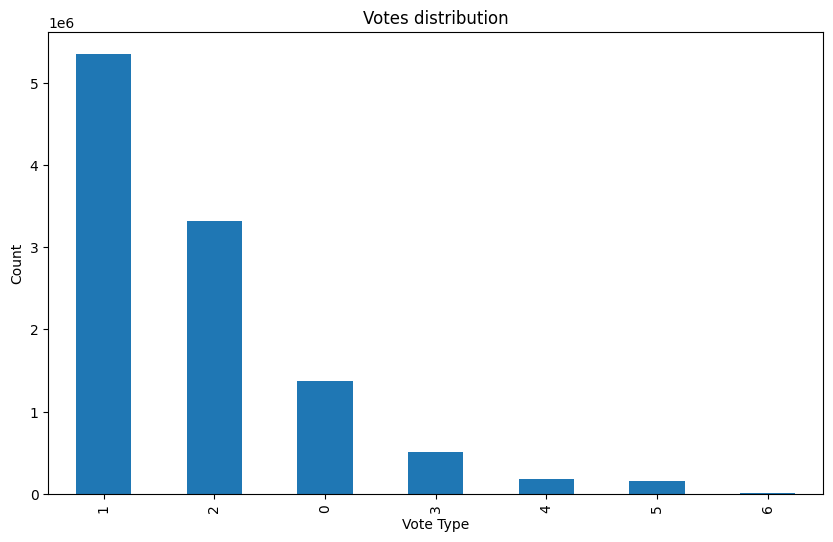

(9520348, 4)


In [19]:
# display a line plot of the different types of votes
plt.figure(figsize=(10, 6))
meps_melted_EP9['Vote'].value_counts().plot(kind='bar')
plt.title('Votes distribution')
plt.xlabel('Vote Type')
plt.ylabel('Count')
plt.show()

# delete rows with zero votes
meps_melted_EP9 = meps_melted_EP9[meps_melted_EP9['Vote'] != 0]
print(meps_melted_EP9.shape)

In [20]:
# set all votes > 1 to 0, 1 for in favour, 0 for all other votes
meps_melted_EP9['Vote'] = meps_melted_EP9['Vote'].apply(lambda x: 0 if x > 1 else x)
meps_melted_EP8['Vote'] = meps_melted_EP8['Vote'].apply(lambda x: 0 if x > 1 else x)
meps_melted_EP7['Vote'] = meps_melted_EP7['Vote'].apply(lambda x: 0 if x > 1 else x)

# group df_mps_melted by EPG and Title and calculate the sum of votes that are 1
meps_grouped_EP9 = meps_melted_EP9.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index() # in agg-function, function to use on column has to ba a string, see "sum"
meps_grouped_EP8 = meps_melted_EP8.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index()
meps_grouped_EP7 = meps_melted_EP7.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index()

# sort the df_mps_grouped by EPG and Title
meps_grouped_EP9 = meps_grouped_EP9.sort_values(by=['Title', "EPG"])
meps_grouped_EP8 = meps_grouped_EP8.sort_values(by=['Title', "EPG"])
meps_grouped_EP7 = meps_grouped_EP7.sort_values(by=['Title', "EPG"])

print(meps_grouped_EP8.head(20))

# print number of NANs in Vote
print(f"Number of NaNs EP9: {meps_grouped_EP9['Vote'].isnull().sum()}")
print(f"Number of NaNs EP8: {meps_grouped_EP8['Vote'].isnull().sum()}")
print(f"Number of NaNs EP7: {meps_grouped_EP7['Vote'].isnull().sum()}")

              EPG  Title  Vote
0             ECR      1    17
10252     EFD/IDG      1     2
20504         EPP      1   169
30756  Greens/EFA      1     3
41008          NI      1     4
51260         REG      1    41
61512         S&D      1   131
71764    The Left      1     0
1             ECR      2     2
10253     EFD/IDG      2    54
20505         EPP      2     2
30757  Greens/EFA      2     6
41009          NI      2    14
51261         REG      2     7
61513         S&D      2    10
71765    The Left      2    34
2             ECR      3     3
10254     EFD/IDG      3    32
20506         EPP      3     0
30758  Greens/EFA      3    40
Number of NaNs EP9: 0
Number of NaNs EP8: 0
Number of NaNs EP7: 0


In [21]:
# create a list of the number of members per group at Constitutive Session
members_EP9 = [62, 182, 73, 74, 57, 108, 154, 41, 751] # total of 751 members, pre-Brexit, before EP was reduced to 705 members
members_EP8 = [70, 221, 48, 50, 52, 67, 191, 52, 751] # total of 751 members
members_EP7 = [57, 273, 31, 57, 33, 83, 195, 35, 736] # total of 736 members, pre joining of Croatia

# dataframe with group name and number of members
group_members = pd.DataFrame({'group': ['ECR', 'EPP', 'EFD/IDG', 'Greens/EFA', "NI", 'REG', 'S&D', 'The Left', "total"],
                              'EP9': members_EP9,
                              'EP8': members_EP8,
                              'EP7': members_EP7}
                              )
# set groups as index
group_members.set_index('group', inplace=True)
group_members

,EP9,EP8,EP7
group,,,
ECR,62,70,57
EPP,182,221,273
EFD/IDG,73,48,31
Greens/EFA,74,50,57
NI,57,52,33
REG,108,67,83
S&D,154,191,195
The Left,41,52,35
total,751,751,736


In [22]:
# Calculate the percentage of votes in favour for each group
meps_grouped_EP9 = fu.calculate_percentage_votes(meps_grouped_EP9, group_members, "EP9")
meps_grouped_EP8 = fu.calculate_percentage_votes(meps_grouped_EP8, group_members, "EP8")
meps_grouped_EP7 = fu.calculate_percentage_votes(meps_grouped_EP7, group_members, "EP7")

display(meps_grouped_EP7.head(20))

,EPG,Title,Vote,members,Sum_in_favour,Perc_in_favour
0,ECR,1,0,57,0,0.000
6961,EFD/IDG,1,6,31,6,0.194
13922,EPP,1,2,273,2,0.007
20883,Greens/EFA,1,34,57,34,0.596
27844,NI,1,4,33,4,0.121
34805,REG,1,7,83,7,0.084
41766,S&D,1,77,195,77,0.395
48727,The Left,1,5,35,5,0.143
1,ECR,2,31,57,31,0.544
6962,EFD/IDG,2,10,31,10,0.323


In [23]:
# pivot table back to wide format, set EPG and Title as columns, keep index
perc_in_favour_EP9 = meps_grouped_EP9.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])
perc_in_favour_EP8 = meps_grouped_EP8.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])
perc_in_favour_EP7 = meps_grouped_EP7.pivot(index='Title', columns='EPG', values=["Sum_in_favour", 'Perc_in_favour'])

# rename columns
column_names = ["ECR", "EFD/IDG", "EPP", "Greens/EFA", "NI", "REG", "S&D", "The Left",
                                "ECR%", "EFD/IDG%", "EPP%", "Greens/EFA%", "NI%", "REG%", "S&D%", "The Left%"
                                ]
print(len(column_names))
perc_in_favour_EP9.columns = column_names
perc_in_favour_EP8.columns = column_names
perc_in_favour_EP7.columns = column_names

display(perc_in_favour_EP9.head(20))

# save group_perc_in_favour to csv
perc_in_favour_EP9.to_csv('data/perc_in_favour_EP9.csv')

16


,ECR,EFD/IDG,EPP,Greens/EFA,NI,REG,S&D,The Left,ECR%,EFD/IDG%,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%
Title,,,,,,,,,,,,,,,,
1,0.0,0.0,3.0,40.0,2.0,2.0,13.0,23.0,0.000,0.000,0.016,0.541,0.035,0.019,0.084,0.561
2,1.0,0.0,5.0,67.0,7.0,83.0,114.0,34.0,0.016,0.000,0.027,0.905,0.123,0.769,0.740,0.829
3,2.0,0.0,118.0,62.0,7.0,91.0,121.0,36.0,0.032,0.000,0.648,0.838,0.123,0.843,0.786,0.878
4,1.0,0.0,125.0,65.0,5.0,92.0,122.0,31.0,0.016,0.000,0.687,0.878,0.088,0.852,0.792,0.756
5,1.0,0.0,129.0,67.0,4.0,99.0,128.0,38.0,0.016,0.000,0.709,0.905,0.070,0.917,0.831,0.927
6,47.0,0.0,138.0,5.0,16.0,101.0,11.0,35.0,0.758,0.000,0.758,0.068,0.281,0.935,0.071,0.854
7,46.0,3.0,129.0,7.0,2.0,98.0,65.0,2.0,0.742,0.041,0.709,0.095,0.035,0.907,0.422,0.049
8,48.0,28.0,144.0,67.0,20.0,99.0,96.0,4.0,0.774,0.384,0.791,0.905,0.351,0.917,0.623,0.098
9,50.0,27.0,144.0,3.0,13.0,100.0,77.0,0.0,0.806,0.370,0.791,0.041,0.228,0.926,0.500,0.000


In [24]:
# merge perc_in_favour with voted_docs, merge index with Vote ID
voted_laws_groups_EP9 = voted_laws_EP9.merge(perc_in_favour_EP9, left_on='Vote ID', right_index=True)
voted_laws_groups_EP8 = voted_laws_EP8.merge(perc_in_favour_EP8, left_on='Vote ID', right_index=True)
voted_laws_groups_EP7 = voted_laws_EP7.merge(perc_in_favour_EP7, left_on='Vote ID', right_index=True)

display(voted_laws_EP9.shape)
print(perc_in_favour_EP9.shape)
print(voted_laws_groups_EP9.shape)
display(voted_laws_groups_EP9.head())

print(voted_laws_EP8.shape)
print(perc_in_favour_EP8.shape)
print(voted_laws_groups_EP8.shape)  

print(voted_laws_EP7.shape)
print(perc_in_favour_EP7.shape)
print(voted_laws_groups_EP7.shape)


(193, 24)

(13459, 16)
(193, 40)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,S&D,The Left,ECR%,EFD/IDG%,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,119.0,29.0,0.581,0.466,0.764,0.784,0.421,0.713,0.773,0.707
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,126.0,32.0,0.710,0.205,0.808,0.865,0.439,0.833,0.818,0.780
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,131.0,31.0,0.806,0.685,0.808,0.892,0.895,0.852,0.851,0.756
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,118.0,35.0,0.726,0.000,0.813,0.851,0.316,0.778,0.766,0.854
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,118.0,0.0,0.774,0.014,0.808,0.068,0.404,0.944,0.766,0.000


(534, 24)
(10252, 16)
(533, 40)
(500, 24)
(6961, 16)
(500, 40)


Die unteren zwei Code Cells besser erst auf die kleinere Anzahl von Gesetzen anwenden.

In [93]:
tested_thresholds_EP9 = fu.test_thresholds(voted_laws_groups_EP9, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP9)

tested_thresholds_EP8 = fu.test_thresholds(voted_laws_groups_EP8, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP8)

tested_thresholds_EP7 = fu.test_thresholds(voted_laws_groups_EP7, [0.66, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1.0])
display(tested_thresholds_EP7)


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,166,0.86,11,0.06,7,0.04
0.70,160,0.83,8,0.04,8,0.04
0.75,149,0.77,9,0.05,6,0.03
0.80,135,0.7,10,0.05,6,0.03
0.85,119,0.62,2,0.01,6,0.03
0.90,91,0.47,0,0.0,6,0.03
0.95,0,0.0,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,180,0.34,6,0.01,90,0.17
0.70,167,0.31,4,0.01,71,0.13
0.75,136,0.26,7,0.01,54,0.1
0.80,73,0.14,2,0.0,34,0.06
0.85,12,0.02,1,0.0,4,0.01
0.90,0,0.0,0,0.0,0,0.0
0.95,0,0.0,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


,General Majority,GM%,Right Majority,RM%,Left Majority,LM%
Threshold,,,,,,
0.66,334,0.67,2,0.0,39,0.08
0.70,298,0.6,0,0.0,42,0.08
0.75,234,0.47,0,0.0,35,0.07
0.80,166,0.33,0,0.0,26,0.05
0.85,83,0.17,0,0.0,7,0.01
0.90,6,0.01,0,0.0,1,0.0
0.95,0,0.0,0,0.0,0,0.0
0.97,0,0.0,0,0.0,0,0.0
0.99,0,0.0,0,0.0,0,0.0


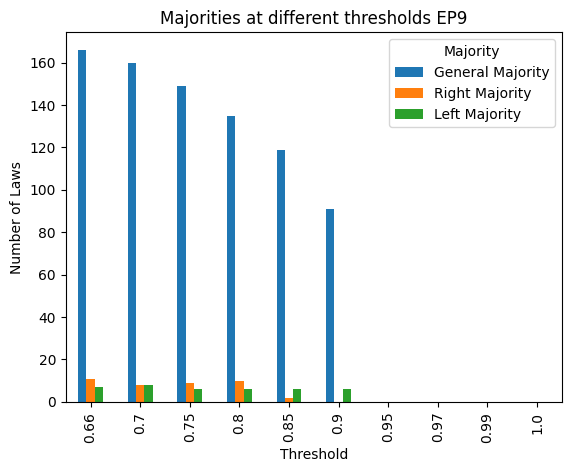

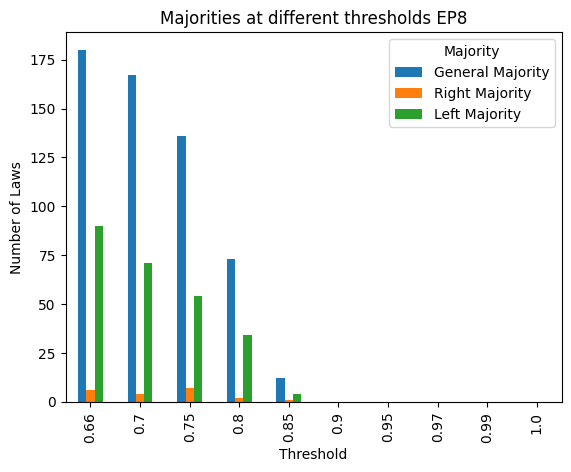

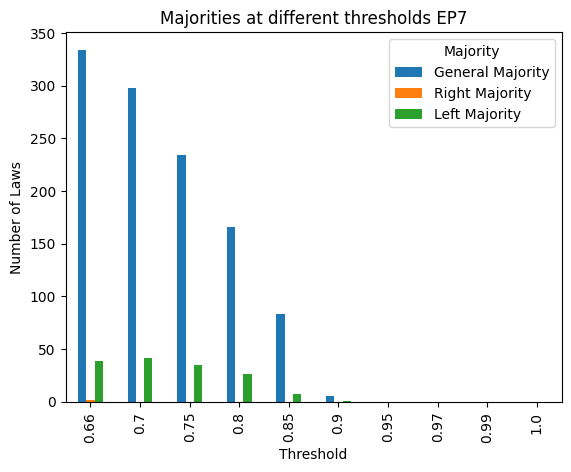

In [94]:
# plot the thresholds
# create a figure and a set of subplots
# plot the thresholds for EP9
tested_thresholds_EP9[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP9')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

# plot the thresholds for EP8
tested_thresholds_EP8[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP8')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

# plot the thresholds for EP7
tested_thresholds_EP7[["General Majority", "Right Majority", "Left Majority"]].plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds EP7')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.legend(title='Majority')
plt.show()

In [88]:
# Add consensus classes to the dataframes
# EP9
voted_majorities_EP9 = fu.get_majorities(voted_laws_groups_EP9, 0.66)
voted_laws_consensus_EP9 = pd.concat([voted_laws_groups_EP9, voted_majorities_EP9], axis=1)
# add column "Consensus" if column "No" (Votes Against) is 0
voted_laws_consensus_EP9['Consensus'] = voted_laws_consensus_EP9['No'].apply(lambda x: 1 if x == 0 else 0)
display(voted_laws_consensus_EP9.head(10))
# EP8
voted_majorities_EP8 = fu.get_majorities(voted_laws_groups_EP8, 0.66)
voted_laws_consensus_EP8 = pd.concat([voted_laws_groups_EP8, voted_majorities_EP8], axis=1)
voted_laws_consensus_EP8['Consensus'] = voted_laws_consensus_EP8['No'].apply(lambda x: 1 if x == 0 else 0)
# EP7
voted_majorities_EP7 = fu.get_majorities(voted_laws_groups_EP7, 0.66)
voted_laws_consensus_EP7 = pd.concat([voted_laws_groups_EP7, voted_majorities_EP7], axis=1)
voted_laws_consensus_EP7['Consensus'] = voted_laws_consensus_EP7['No'].apply(lambda x: 1 if x == 0 else 0)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,EPP%,Greens/EFA%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.764,0.784,0.421,0.713,0.773,0.707,0,0,1,0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.808,0.865,0.439,0.833,0.818,0.780,1,0,0,0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.808,0.892,0.895,0.852,0.851,0.756,1,0,0,1
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.813,0.851,0.316,0.778,0.766,0.854,1,0,0,0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.808,0.068,0.404,0.944,0.766,0.000,1,0,0,0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.769,0.068,0.351,0.954,0.844,0.000,1,0,0,0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.885,1.000,0.421,1.009,0.935,0.610,1,0,0,0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.868,0.986,0.456,0.981,0.929,0.049,1,0,0,0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.885,1.000,0.456,1.009,0.935,0.049,1,0,0,0
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,0.885,1.000,0.439,1.009,0.935,0.024,1,0,0,0


In [90]:
# save to csv
voted_laws_consensus_EP9.to_csv('data/voted_laws_consensus_EP9.csv', index=False)
voted_laws_consensus_EP8.to_csv('data/voted_laws_consensus_EP8.csv', index=False)
voted_laws_consensus_EP7.to_csv('data/voted_laws_consensus_EP7.csv', index=False)

,Consensus,Right Majority,Left Majority,General Majority
2009-2014,4,2,39,334
2014-2019,0,6,90,180
2019-2022,4,11,7,166


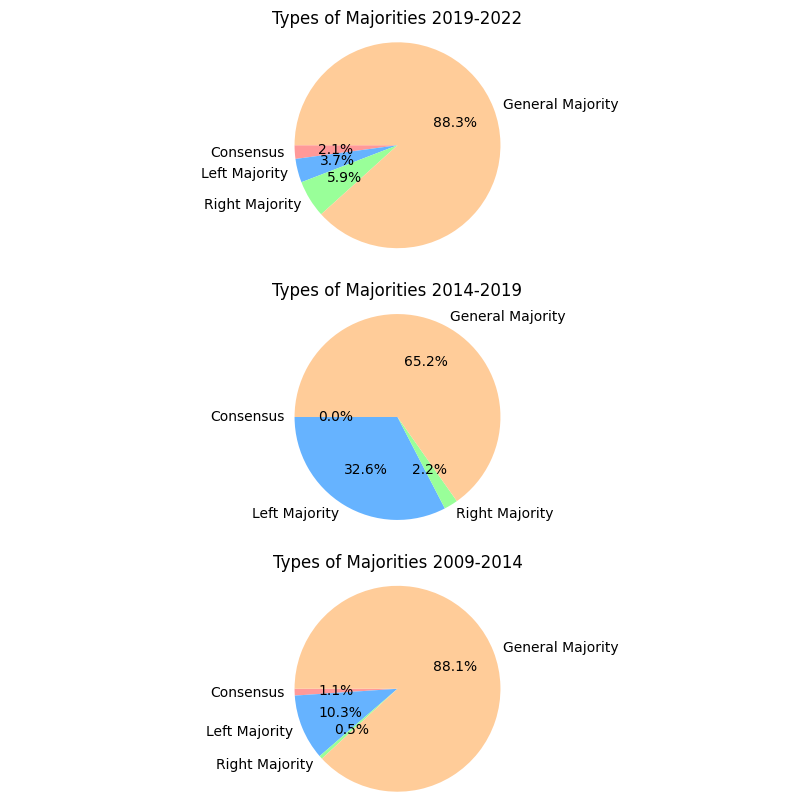

In [91]:
# Create dataframe with number of laws with consensus, right majority, left majority and general majority per year
consensus_EP9 = voted_laws_consensus_EP9['Consensus'].sum()
right_majority_EP9 = voted_laws_consensus_EP9['Right Majority'].sum()
left_majority_EP9 = voted_laws_consensus_EP9['Left Majority'].sum()
general_majority_EP9 = voted_laws_consensus_EP9['General Majority'].sum()

consensus_EP8 = voted_laws_consensus_EP8['Consensus'].sum()
right_majority_EP8 = voted_laws_consensus_EP8['Right Majority'].sum()
left_majority_EP8 = voted_laws_consensus_EP8['Left Majority'].sum()
general_majority_EP8 = voted_laws_consensus_EP8['General Majority'].sum()

consensus_EP7 = voted_laws_consensus_EP7['Consensus'].sum()
right_majority_EP7 = voted_laws_consensus_EP7['Right Majority'].sum()
left_majority_EP7 = voted_laws_consensus_EP7['Left Majority'].sum()
general_majority_EP7 = voted_laws_consensus_EP7['General Majority'].sum()

consensus = [consensus_EP7, consensus_EP8, consensus_EP9]
right_majority = [right_majority_EP7, right_majority_EP8, right_majority_EP9]
left_majority = [left_majority_EP7, left_majority_EP8, left_majority_EP9]
general_majority = [general_majority_EP7, general_majority_EP8, general_majority_EP9]

# combine to dataframe
majorities = pd.DataFrame({'Consensus': consensus, 'Right Majority': right_majority, 'Left Majority': left_majority, 'General Majority': general_majority})
majorities.index = ['2009-2014', '2014-2019', '2019-2022']
display(majorities)

# Plot a pie chart of the different types of majorities
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP9, left_majority_EP9, right_majority_EP9, general_majority_EP9]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[0].set_title('Types of Majorities 2019-2022')
axs[0].axis('equal')
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP8, left_majority_EP8, right_majority_EP8, general_majority_EP8]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[1].set_title('Types of Majorities 2014-2019')
axs[1].axis('equal')
labels = ['Consensus', 'Left Majority', 'Right Majority', 'General Majority']
sizes = [consensus_EP7, left_majority_EP7, right_majority_EP7, general_majority_EP7]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axs[2].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[2].set_title('Types of Majorities 2009-2014')
axs[2].axis('equal')
plt.show()

With amendments, the votes have been given in a more diverse way.
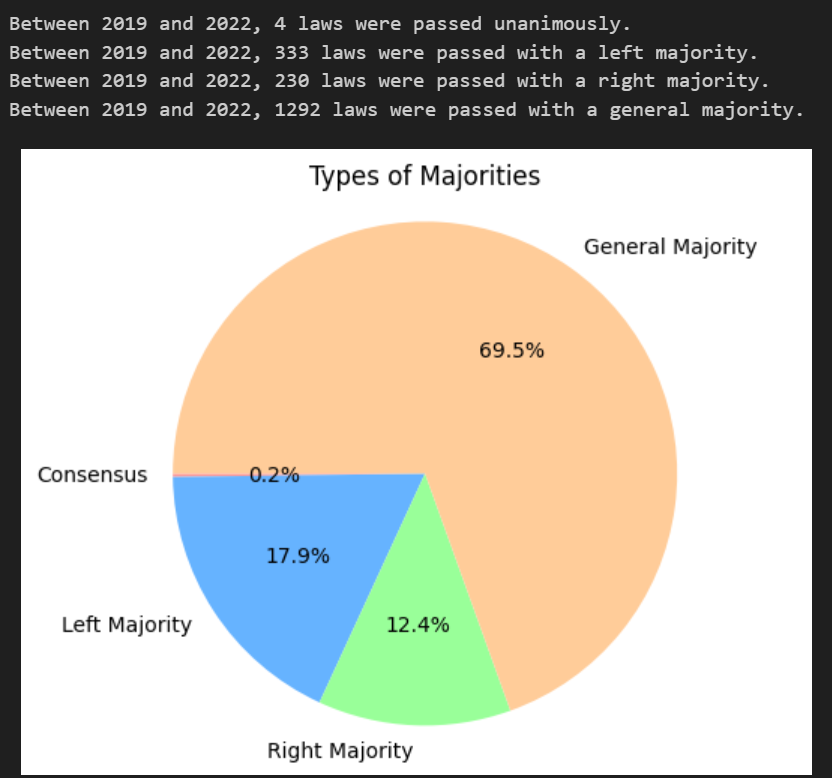

Dieses Filtern nochmal genau überprüfen!

In dieser Auswahl fehlt zum Beispiel ein Gesetz, das im Subject Proposal to reject the Commission proposal hat, Index 1017. Warum ist das nicht drin?

If the major parties voted in favour, in how many cases did the further right- or left-leaning parties vote with them?

Das hier nochmal überprüfen - haben NI tatsächlich in fast allen Fällen sowohl mit Rechts als auch mit Links gewählt?

In [95]:
vote_alingment = fu.get_vote_alingment(voted_laws_consensus_EP9, 
                                    ['The Left', "Greens/EFA", "S&D", "REG", "EPP", "ECR", "EFD/IDG", "NI"], 
                                    ['Left Majority', "Right Majority", "General Majority"]
                                    )
# rename columns
vote_alingment.columns = ['Left Majority', 'Left Majority%', 'Right Majority', 'Right Majority%', 'General Majority', 'General Majority%']

display(vote_alingment)

,Left Majority,Left Majority%,Right Majority,Right Majority%,General Majority,General Majority%
Voted with,,,,,,
The Left,7,100.00%,7,63.64%,157,94.58%
Greens/EFA,7,100.00%,10,90.91%,162,97.59%
S&D,7,100.00%,11,100.00%,166,100.00%
REG,7,100.00%,11,100.00%,166,100.00%
EPP,7,100.00%,11,100.00%,166,100.00%
ECR,7,100.00%,11,100.00%,166,100.00%
EFD/IDG,4,57.14%,11,100.00%,162,97.59%
NI,7,100.00%,11,100.00%,166,100.00%


Add legislative text to each row in the dataframe

In [30]:
# extract report links
voted_laws_final_EP9 = fu.construct_report_links(voted_laws_consensus_EP9)
voted_laws_final_EP8 = fu.construct_report_links(voted_laws_consensus_EP8)
voted_laws_final_EP7 = fu.construct_report_links(voted_laws_consensus_EP7)
display(voted_laws_final_EP9.head(10))
print(voted_laws_final_EP9.shape)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Greens/EFA%,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.784,0.421,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.865,0.439,0.833,0.818,0.780,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.892,0.895,0.852,0.851,0.756,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.851,0.316,0.778,0.766,0.854,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.068,0.404,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.068,0.351,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.000,0.421,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.986,0.456,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.000,0.456,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,1.000,0.439,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...


(193, 45)


In [31]:
# extract summary links
# take each link from column "Report link", parse html, find "button" with id "summary"
summary_links_EP9 = fu.extract_summary_links(voted_laws_final_EP9['Report link'])
summary_links_EP8 = fu.extract_summary_links(voted_laws_final_EP8['Report link'])
summary_links_EP7 = fu.extract_summary_links(voted_laws_final_EP7['Report link'])

Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2019/0001(COD)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan: 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=nan
Links requested: 193
Total links successfully extracted 191 out of 193
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2014/033(COD): 404 Client Error: Not Found for url: https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2014/033(COD)
Failed to retrieve or parse https://oeil.secure.europarl.europa.eu/oeil/popups/ficheprocedure.do?lang=en&reference=2016/0400(COD): 404 Client E

In [32]:
# print first ten summary links
print(summary_links_EP9[:10])
print(summary_links_EP8[:10])
print(summary_links_EP7[:10])
# print number of NAs in summary links
print(summary_links_EP9.count("NA"))
print(summary_links_EP8.count("NA"))
print(summary_links_EP7.count("NA"))

['https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589986&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1594772&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589981&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589992&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589357&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1589750&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1590181&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585141&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1585147&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1598542&t=e&l=en']
['https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?id=1368921&t=e&l=en', 'https://oeil.secure.europarl.europa.eu/oeil/popups/summary.do?

In [33]:
# add summary links to voted_docs_final
voted_laws_final_EP9['Summary link'] = summary_links_EP9
voted_laws_final_EP8['Summary link'] = summary_links_EP8
voted_laws_final_EP7['Summary link'] = summary_links_EP7
voted_laws_final_EP8.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,NI%,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link
0,1398,41.0,1.0,9.09.2015,Fisheries partnership agreement with Guinea-Bi...,***,Leg,Draft legislative resolution,s,João Ferreira,...,0.135,0.642,0.801,0.385,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
2,1400,41.0,1.0,9.09.2015,Fisheries partnership agreement with Cape Verd...,***,Leg,Draft legislative resolution,s,van Dalen,...,0.154,0.687,0.832,0.346,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
5,1403,41.0,1.0,9.09.2015,Fisheries partnership agreement with Madagasca...,***,Leg,Draft legislative resolution,s,Santos,...,0.212,0.701,0.864,0.096,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
6,1404,41.0,1.0,9.09.2015,Protocol amending the Marrakesh agreement esta...,***,Leg,Draft legislative resolution,s,Bidegain,...,0.115,0.701,0.869,0.019,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
8,1406,41.0,1.0,9.09.2015,"Authorisation for Austria, Belgium and Poland ...",***,Leg,Draft legislative resolution,s,Svoboda,...,0.269,0.716,0.874,0.769,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
195,1315,84.0,1.0,9.06.2016,Promoting free movement by simplifying the acc...,***II,Leg,Draft legislative resolution,q,Delvaux,...,0.135,0.194,0.817,0.827,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
196,1316,84.0,1.0,9.06.2016,Transfer to the General Court of jurisdiction ...,***I,Leg,Draft legislative resolution,s,Delvaux,...,0.019,0.000,0.000,0.000,0,1,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
201,913,33.0,1.0,9.06.2015,Adjustment rate for direct payments in respect...,***I,Leg,Draft legislative resolution,s,Siekierski,...,0.154,0.672,0.791,0.731,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
216,928,70.0,1.0,9.03.2016,Reduction in the sulphur content of certain li...,***I,Leg,Draft legislative resolution,s,Ferrara,...,0.000,0.537,0.052,0.000,0,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...
217,929,70.0,1.0,9.03.2016,Trade diversion into the European Union of cer...,***I,Leg,Draft legislative resolution,s,Ferrara,...,0.192,0.672,0.812,0.769,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...


In [77]:
# extract summary texts
summary_texts_EP9 = fu.extract_summary_texts(voted_laws_final_EP9['Summary link'])
summary_texts_EP8 = fu.extract_summary_texts(voted_laws_final_EP8['Summary link'])
summary_texts_EP7 = fu.extract_summary_texts(voted_laws_final_EP7['Summary link'])


Failed to retrieve or parse <NA>: Invalid URL '<NA>': No scheme supplied. Perhaps you meant https://<NA>?
Failed to retrieve or parse <NA>: Invalid URL '<NA>': No scheme supplied. Perhaps you meant https://<NA>?
Summaries extracted: 193
Total summaries successfully extracted 190 out of 193
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Summaries extracted: 531
Total summaries successfully extracted 507 out of 533
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA: Invalid URL 'NA': No scheme supplied. Perhaps you meant https://NA?
Failed to retrieve or parse NA

In [78]:
# append texts to voted_docs_final as new column
voted_laws_final_EP9['Summary text'] = summary_texts_EP9
voted_laws_final_EP8['Summary text'] = summary_texts_EP8
voted_laws_final_EP7['Summary text'] = summary_texts_EP7
voted_laws_final_EP9.head(10)

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.833,0.818,0.780,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.852,0.851,0.756,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.778,0.766,0.854,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.954,0.844,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to review the functioning of an exist...
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,1.009,0.935,0.610,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to provide further macro-financial as...
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.981,0.929,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,1.009,0.935,0.049,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to conclude an agreement between the ...
460,461,19,1,17.12.2019,Protocol to EU-Switzerland Agreement concernin...,***,Leg,Draft legislative resolution,s,Wiśniewska,...,1.009,0.935,0.024,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"The Committee on Civil Liberties, Justice and ..."


In [79]:
# print number of NAs in Summary text
print((voted_laws_final_EP9['Summary text']=="NA").sum())
print((voted_laws_final_EP8['Summary text']=="NA").sum())
print((voted_laws_final_EP7['Summary text']=="NA").sum())

# print sum of all non-NA Summary texts
summaries_EP9 = (voted_laws_final_EP9['Summary text']!="NA").sum()
summaries_EP8 = (voted_laws_final_EP8['Summary text']!="NA").sum()
summaries_EP7 = (voted_laws_final_EP7['Summary text']!="NA").sum()
print(f"Total number of summaries extracted: {summaries_EP9 + summaries_EP8 + summaries_EP7} out of {voted_laws_final_EP9.shape[
    0] + voted_laws_final_EP8.shape[0] + voted_laws_final_EP7.shape[0]}")


3
26
88
Total number of summaries extracted: 1109 out of 1226


In [81]:
# save voted_docs_final
voted_laws_final_EP9.to_csv('data/voted_laws_final_EP9.csv')
voted_laws_final_EP8.to_csv('data/voted_laws_final_EP8.csv')
voted_laws_final_EP7.to_csv('data/voted_laws_final_EP7.csv')

Andere Fragen:

Is there a difference in consensus between adopted and rejected laws?